1. Image Classification Project using logistic regression and CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [3]:
#image processing
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
#reshaping for cnn
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [5]:
X_train_lr = X_train.reshape(-1, 28*28)
X_test_lr = X_test.reshape(-1, 28*28)

In [6]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [7]:
#logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_lr, y_train)

y_pred_lr = lr_model.predict(X_test_lr)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9264


In [8]:
#cnn
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = cnn_model.fit(X_train_cnn, y_train_cat,
                        epochs=10,
                        validation_split=0.2)

d:\Task 5\newenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  trainable=True,


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9566 - loss: 0.1429 - val_accuracy: 0.9824 - val_loss: 0.0588
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9852 - loss: 0.0453 - val_accuracy: 0.9856 - val_loss: 0.0489
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9902 - val_loss: 0.0358
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9891 - val_loss: 0.0381
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9941 - loss: 0.0171 - val_accuracy: 0.9903 - val_loss: 0.0384
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9955 - loss: 0.0127 - val_accuracy: 0.9887 - val_loss: 0.0424
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9963 - loss: 0.0107 - val_accuracy: 0.9908 - val_loss: 0.0404
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9967 -

In [9]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cat)
print("CNN Accuracy:", cnn_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9906 - loss: 0.0382
CNN Accuracy: 0.9905999898910522


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


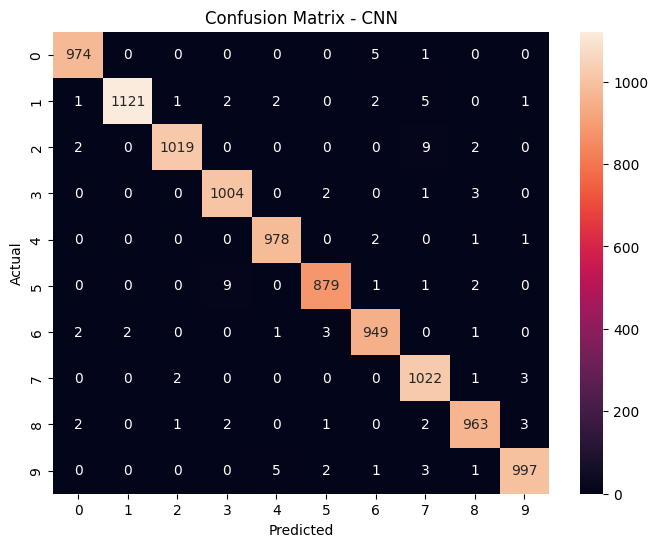

In [10]:
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

cm = confusion_matrix(y_test, y_pred_cnn_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

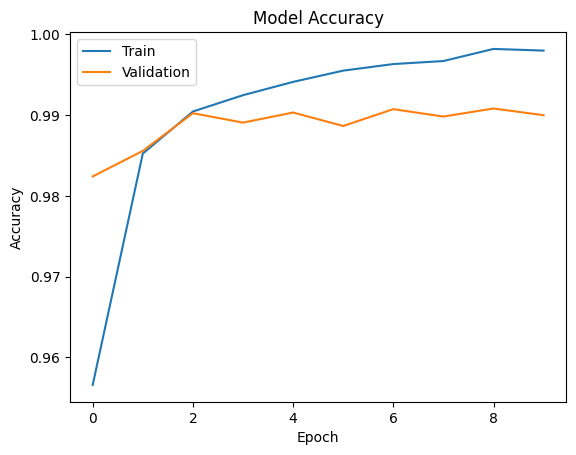

In [11]:
#train vs val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()